##Descarga  y descomprimido de archivos

#Carga del archivo train.csv

In [ ]:
!pip install rlxutils

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
from rlxutils import subplots

In [40]:
# Descargar directamente desde Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Extraer el file ID del enlace de Google Drive
file_id = "114YfOz3i3wGl6Cz3s_v91eW0L0ErgyUV"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, 'train.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE
From (redirected): https://drive.google.com/uc?id=1EFM-jnbWsT2buCk6NjT_XAffz0oeVyLE&confirm=t&uuid=582552ce-8593-49c3-8d68-489764070ffe
To: /content/train.csv
100%|██████████| 118M/118M [00:00<00:00, 217MB/s]


'train.csv'

In [41]:
#Lectura y muestra del csv
z = pd.read_csv('train.csv')
print("Tamaño del dataframe", z.shape)
z.head()

Tamaño del dataframe (692500, 12)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


##Usaremos estrato y acceso a internet

In [42]:
z = z[['FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET', 'RENDIMIENTO_GLOBAL']]
z.head()

,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Si,medio-alto
1,Estrato 3,No,bajo
2,Estrato 3,Si,bajo
3,Estrato 4,Si,alto
4,Estrato 3,Si,medio-bajo


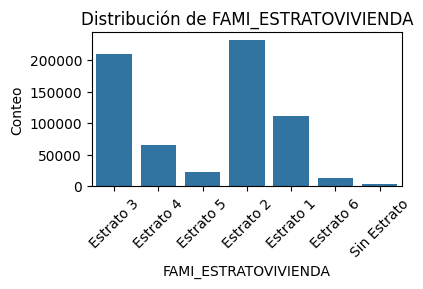

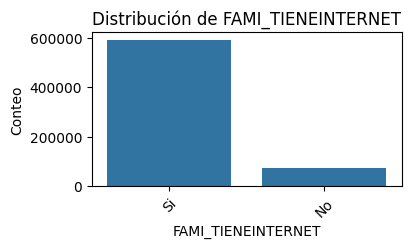

In [43]:
# Define las variables que deseas graficar
variables = ["FAMI_ESTRATOVIVIENDA", "FAMI_TIENEINTERNET"]

# Crea un bucle para graficar cada variable
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=var, data=z)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.show()

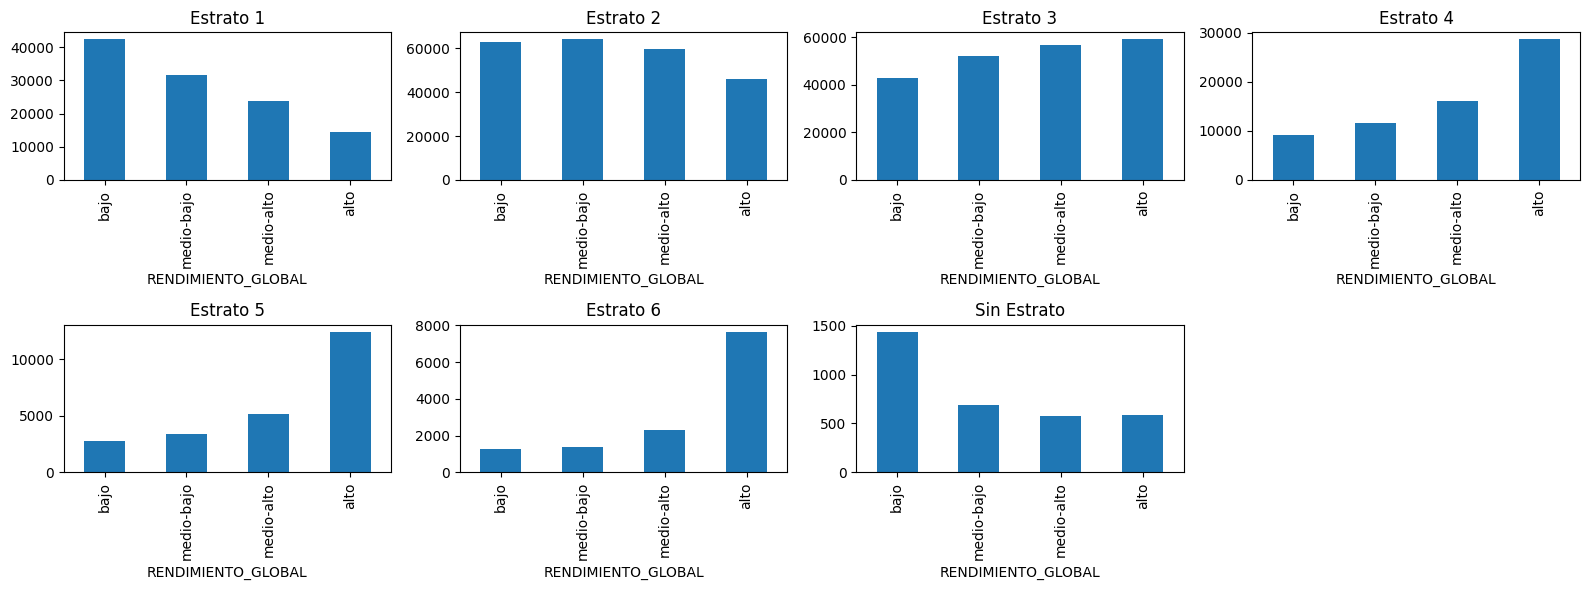

In [44]:
c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

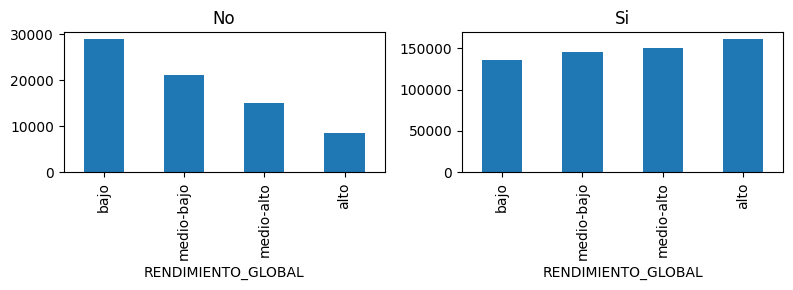

In [45]:
c = sorted(z.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_TIENEINTERNET==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

In [46]:
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())

(32137, 26629)

In [48]:
z.FAMI_ESTRATOVIVIENDA.values[z.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
z.FAMI_TIENEINTERNET.values[z.FAMI_TIENEINTERNET.isna()] = 'no info'
sum(z.FAMI_ESTRATOVIVIENDA.isna()), sum(z.FAMI_TIENEINTERNET.isna())

(0, 0)

In [50]:
cmap = {'Estrato 1': 1,
 'Estrato 2': 2,
 'Estrato 3': 3,
 'Estrato 4': 4,
 'Estrato 5': 5,
 'Estrato 6': 6,
 'Sin Estrato': 0,
 'no info': -1}


z.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in z.FAMI_ESTRATOVIVIENDA]]
z.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,232671
3,210685
1,111991
4,65514
-1,32137
5,23608
6,12605
0,3289


In [51]:
x = z.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(x))
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}
FAMI_TIENEINTERNET_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [52]:
FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in z.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [53]:
FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


In [54]:
z = pd.concat([FAMI_TIENEINTERNET_df, z], axis=1).drop('FAMI_TIENEINTERNET', axis=1)
z.shape

(692500, 5)

In [55]:
z.head()

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,3,medio-alto
1,1.0,0.0,0.0,3,bajo
2,0.0,1.0,0.0,3,bajo
3,0.0,1.0,0.0,4,alto
4,0.0,1.0,0.0,3,medio-bajo


In [56]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,FAMI_TIENEINTERNET__No,FAMI_TIENEINTERNET__Si,FAMI_TIENEINTERNET__no info,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,3,2
1,1.0,0.0,0.0,3,0
2,0.0,1.0,0.0,3,0
3,0.0,1.0,0.0,4,3
4,0.0,1.0,0.0,3,1
